In [1]:
import pandas as pd
import numpy as np

# Read a comma-separated values (csv) file into DataFrame.

The data folder contains a file named "newark_tree_data.csv". Read this file into a dataframe.


resources:
* [Pandas read csv docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)

In [19]:
# Create DataFrame here.
tree=pd.read_csv('data/newark_tree_data.csv')

In [3]:
# Display the first few rows of the DataFrame here.
tree.head()

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
0,11.0,Elan Park,Elan Park,2,Blue Hen Rg,11.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,40,0-5%,0-5%
1,12.0,Elan Park,Elan Park,2,Blue Hen Rg,12.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,41,0-5%,0-5%
2,13.0,Elan Park,Elan Park,2,Blue Hen Rg,13.0,Front,False,"pine, eastern white",Pinus strobus,...,False,False,False,False,True,False,No,54,0-5%,6-10%
3,14.0,Elan Park,Elan Park,2,Blue Hen Rg,14.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,57,11-15%,26-30%
4,15.0,Elan Park,Elan Park,2,Blue Hen Rg,15.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,55,11-15%,21-25%


In [4]:
# How many columns does the DataFrame contain? 54
tree.shape

(4193, 54)

In [5]:
# What attributes (columns) does this DataFrame contain?
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4193 entries, 0 to 4192
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          4193 non-null   float64
 1   ON          4193 non-null   object 
 2   AREA        4169 non-null   object 
 3   ADDRESS     4193 non-null   int64  
 4   STREET      4193 non-null   object 
 5   SITE        4193 non-null   float64
 6   SIDE        4193 non-null   object 
 7   ASSIGNED    4193 non-null   bool   
 8   COMMON      4193 non-null   object 
 9   BOTANICAL   4193 non-null   object 
 10  CULTIVAR    113 non-null    object 
 11  DBH         4193 non-null   float64
 12  REMOVAL     434 non-null    object 
 13  STEMS       4193 non-null   float64
 14  COND        4087 non-null   object 
 15  MAINTPRIM   101 non-null    object 
 16  OBSERVE     4193 non-null   object 
 17  INSPECT     4193 non-null   bool   
 18  LOCATION    4193 non-null   object 
 19  NOTES       1114 non-null  

Upon reviewing the columns of the DataFrame, we see that there is already a column named ID that is well suited for an index column.  

For the purposes of this lab, we are only going to need a few of the available attributes. The attributes we wish to keep are listed below:
* ID
* UNIQUEID
* COMMON
* BOTANICAL
* COND
* RISK
* HEIGHT

Let's provide the index_col and the usecols args when we invoke the read_csv method.

In [155]:
# Create the new DataFrame here.
tree=pd.read_csv('data/newark_tree_data.csv',index_col=['ID'],usecols=['ID','UNIQUEID','COMMON','BOTANICAL','COND','RISK','HEIGHT'])



In [7]:
# Display the first few rows of the new DataFrame here.
tree.head()

,COMMON,BOTANICAL,COND,RISK,UNIQUEID,HEIGHT
ID,,,,,,
11.0,"arborvitae, eastern",Thuja occidentalis,Good,Low,LM 20150929141218,40
12.0,"arborvitae, eastern",Thuja occidentalis,Very Good,Low,LM 20150929141418,40
13.0,"pine, eastern white",Pinus strobus,Good,Low,LM 20150929141844,54
14.0,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,LM 20150929142424,56
15.0,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,LM 20150929143018,55


The data narritive specifies that 4,193 sites were inventoried. Use the DataFrame shape attribute to verify the number of rows.

In [8]:
# How many rows does your DataFrame contain.
tree.shape

(4193, 6)

Let's look at the distribution of data for the HEIGHT attribute.

In [9]:
# What is the min height? 0
tree.min()

COMMON           Amur corktree
BOTANICAL       Abies balsamea
UNIQUEID     LM 20150929131426
HEIGHT                       0
dtype: object

In [10]:
# What is the max height? 140
tree.max()

COMMON       zelkova, Japanese
BOTANICAL    vacant site large
UNIQUEID     SR 20151104161140
HEIGHT                     140
dtype: object

In [11]:
# How do we acquire count, mean, standard deviation, and distribution information from the DataFrame 
# by invoking a single method?
tree.describe()

,HEIGHT
count,4193.000000
mean,55.311472
std,36.293489
min,0.000000
25%,23.000000
50%,50.000000
75%,86.000000
max,140.000000


# Plot a histogram using the HEIGHT attribute. 

resources:
* [Magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
* [Pandas Series Hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist)

In [12]:
# Apply magic command to display matplotlib images inline
%matplotlib inline

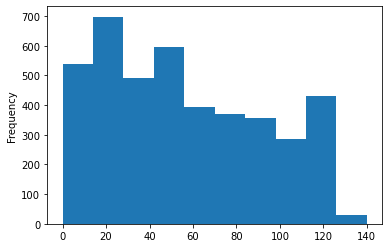

In [13]:
# Create a histogram using the HEIGHT attribute here
tree['HEIGHT'].plot.hist()

The data narrative specifies the following:
"A total of 4,193 sites were inventoried, including 4,087 trees, 100 stumps, and 6 vacant planting sites"

Earlier, we were able to validate the total number of entries in the DataFrame. Let's now dig in a bit deeper and validate the stumps and vacant planting sites.

In [14]:
# How many entries are stumps
stump = tree.loc[tree['COMMON']=='stump']
stump.shape

(100, 6)

In [15]:
# How many entries are vacant sites
stump_vac = tree.loc[(tree['HEIGHT']==0)]

vac=stump_vac.loc[stump_vac['COMMON']!='stump']
vac.shape


(6, 6)

In [16]:
# Do these number add up? yes
tree.shape

(4193, 6)

# Plot a bar graph using the COND attribute.

resources:
* [Pandas Series Bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html#pandas.Series.plot.bar)

In [20]:
# How can we determine all of the possible values describing the condition of a tree and their associated counts?
conditions = tree.groupby(['COND']).nunique()
conditions

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
COND,,,,,,,,,,,,,,,,,,,,,
Critical,74,18,15,13,13,67,1,2,24,24,...,1,2,1,2,2,2,2,38,19,19
Dead,218,23,22,19,19,181,2,2,33,33,...,1,1,1,1,2,1,2,1,6,5
Excellent,163,25,22,24,23,93,2,1,52,52,...,1,1,1,1,2,1,2,39,4,2
Fair,1598,58,57,50,45,396,3,2,109,109,...,2,2,1,2,2,2,3,133,14,10
Good,1168,58,55,57,47,371,3,2,113,113,...,2,2,1,2,2,2,3,130,13,4
Poor,402,47,42,32,35,235,2,2,62,62,...,1,2,2,2,2,2,3,111,14,15
Very Good,381,49,50,58,47,113,3,1,74,74,...,1,2,1,2,2,1,3,74,9,2
Very Poor,83,25,24,18,19,73,2,2,25,25,...,1,2,1,2,2,2,3,50,18,17


In [22]:
# Were these already in the order you would want them to be in order for a graph to make sense? 
# If not, reorder  the Series.
conditions.reindex(['Excellent','Very Good','Good','Fair','Poor','Very Poor','Critical','Dead'])

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
COND,,,,,,,,,,,,,,,,,,,,,
Excellent,163,25,22,24,23,93,2,1,52,52,...,1,1,1,1,2,1,2,39,4,2
Very Good,381,49,50,58,47,113,3,1,74,74,...,1,2,1,2,2,1,3,74,9,2
Good,1168,58,55,57,47,371,3,2,113,113,...,2,2,1,2,2,2,3,130,13,4
Fair,1598,58,57,50,45,396,3,2,109,109,...,2,2,1,2,2,2,3,133,14,10
Poor,402,47,42,32,35,235,2,2,62,62,...,1,2,2,2,2,2,3,111,14,15
Very Poor,83,25,24,18,19,73,2,2,25,25,...,1,2,1,2,2,2,3,50,18,17
Critical,74,18,15,13,13,67,1,2,24,24,...,1,2,1,2,2,2,2,38,19,19
Dead,218,23,22,19,19,181,2,2,33,33,...,1,1,1,1,2,1,2,1,6,5


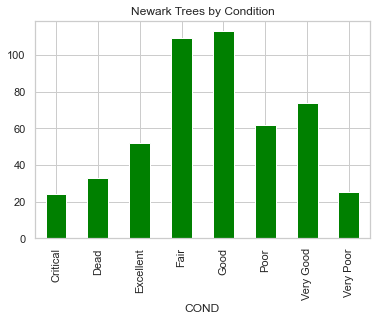

In [93]:
# Plot the Series here
import matplotlib.pyplot as plt
%matplotlib inline
conditions.plot.bar(y="COMMON", title="Newark Trees by Condition", legend=False, color='green')

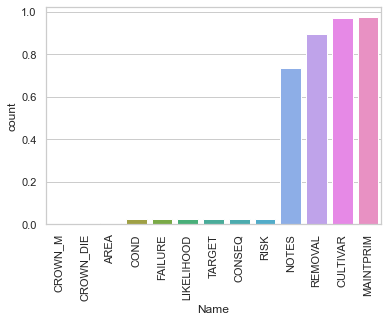

In [92]:
# How many entries have missing values for the COND attribute? Why are these values missing?
# 106, because they were removed or they have notes associated with them. 
missingcond = tree['COND'].isnull().sum()/len(tree)
missingcond


import seaborn as sns
missing_values = tree.isnull().sum() / len(tree)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

# Plot a pie chart using the RISK attribute.

resources:
* [Pandas Series Pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html#pandas.Series.plot.pie)
* [matplotlib pie chart docs](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)

In [131]:
# How can we determine all of the possible values describing the RISK associated with each tree
# along with the corresponding row counts?
risk = tree.groupby(['RISK']).nunique()
risk

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
RISK,,,,,,,,,,,,,,,,,,,,,
High,13,10,11,8,10,13,1,2,8,8,...,1,1,1,1,2,1,1,10,7,6
Low,3833,64,64,80,54,558,3,2,155,155,...,2,2,2,2,2,2,3,137,21,21
Moderate,241,35,34,28,27,173,3,2,40,40,...,1,2,1,2,2,2,3,68,19,21


In [132]:
# Create an array containing the colors green, yellow, and orange
# When we create our pie chart, the colors should be associated with the attributes according to the specifications below:
# Green -> Low
# Yellow -> Moderate
# Orange -> High
colors=np.array(['orange','green','yellow'])

([<matplotlib.patches.Wedge at 0x11f270d60>,
 [Text(1.0915803215564324, 0.1358396171621359, 'High'),
  Text(-0.9678472805825107, 0.5227539014383717, 'Low'),
  Text(0.895883997271779, -0.6382725620237324, 'Moderate')])

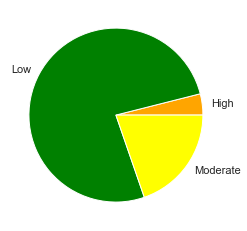

In [151]:
# Plot the pie chart here
risks=np.array(risk['COMMON'])
labels=risk.index
plt.pie(risks, colors = colors,  labels=labels)

In [153]:
# How many entries have missing values for the RISK attribute? Why are these values missing?
# Same reasons as a with condition
missingcond = tree['RISK'].isnull().sum() 
missingcond

106

# Indexing

In [188]:
# Display row by position 1
print(tree.iloc[0])

COMMON       arborvitae, eastern
BOTANICAL     Thuja occidentalis
COND                        Good
RISK                         Low
UNIQUEID       LM 20150929141218
HEIGHT                        40
Name: 11.0, dtype: object


In [192]:
# Display row by label 1
tree.loc[1]

COMMON              locust, black
BOTANICAL    Robinia pseudoacacia
COND                         Poor
RISK                     Moderate
UNIQUEID        LM 20150929131426
HEIGHT                         43
Name: 1.0, dtype: object